# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Чтобы при разделении на тестовую и тренировочную выборку попал одинаковый набор случайных данных,была возможность сравнить решения, то есть обеспечивается воспроизводимость результатов

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [12]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [13]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [14]:
all = pd.concat([df_test.iloc[:5],df_test.iloc[-5:]])
all

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [15]:
nullcolumns = [i for i in df_train.columns if df_train[i].isna().sum() != 0]
for i in nullcolumns:
    print('Столбец', i ,',', 'Кол-во пропусков: ', df_train[i].isna().sum())

Столбец mileage , Кол-во пропусков:  202
Столбец engine , Кол-во пропусков:  202
Столбец max_power , Кол-во пропусков:  196
Столбец torque , Кол-во пропусков:  203
Столбец seats , Кол-во пропусков:  202


In [16]:
nullcolumns = [i for i in df_test.columns if df_test[i].isna().sum() != 0]
for i in nullcolumns:
    print('Столбец', i ,',', 'Кол-во пропусков: ', df_test[i].isna().sum())

Столбец mileage , Кол-во пропусков:  19
Столбец engine , Кол-во пропусков:  19
Столбец max_power , Кол-во пропусков:  19
Столбец torque , Кол-во пропусков:  19
Столбец seats , Кол-во пропусков:  19


In [17]:
#полные дубликаты по всем столбцам
duplicates = df_train[df_train.duplicated(keep=False)]
print(duplicates)

                                  name  year  selling_price  km_driven  \
28                  Fiat Palio 1.2 ELX  2003          70000      50000   
29           Maruti Omni 8 Seater BSIV  2012         150000      35000   
31    Maruti Alto 800 CNG LXI Optional  2019         330000      10000   
32          Maruti Alto K10 VXI Airbag  2019         366000      15000   
33    Hyundai Verna VTVT 1.6 SX Option  2019        1149000       5000   
...                                ...   ...            ...        ...   
6880     Renault Captur 1.5 Diesel RXT  2018        1265000      12000   
6881          Maruti Ciaz Alpha Diesel  2019        1025000      32000   
6989            Maruti Swift Dzire VDI  2015         625000      50000   
6997                   Tata Indigo CR4  2013         290000      25000   
6998                   Tata Indigo CR4  2013         290000      25000   

        fuel seller_type transmission         owner      mileage   engine  \
28    Petrol  Individual       Man

In [18]:
df_train.drop_duplicates(inplace=True)

In [19]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a319b46cfe92ca62c27b0167ac287b09c8317dcb44c24dbd3201027451d0e364
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [20]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, title="Profiling Report")
profile.to_file('Rep.html') #для удобства обращения

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [21]:
df_train.shape

(6014, 13)

In [22]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Сначала разделяла единицы измерения и значения по разным столбцам для того, чтобы делать медианные значения в зависимости от групп с одинаковыми единицами измерения. Но так как они разные только по одному столбцу и процент исключительных невелик, то в первом приближении заполнила просто медианой без этого учета


In [23]:
df_train[['mileage',	'engine',	'max_power','torque']]

,mileage,engine,max_power,torque
0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
3,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"
4,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm
...,...,...,...,...
6992,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm
6993,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm
6994,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm
6995,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)"


In [24]:
for column in df_train[['mileage',	'engine',	'max_power','torque']]:
    df_train[column] = df_train[column].str.extract(r'([\d.]+)').astype(float)

In [25]:
for column in df_test[['mileage',	'engine',	'max_power','torque']]:
    df_test[column] = df_test[column].str.extract(r'([\d.]+)').astype(float)

In [26]:
df_train.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,float64


In [27]:
for column in df_train.select_dtypes(include=[np.int64, np.float64]).columns:
    median_value = df_train[column].median()
    df_train[column].fillna(median_value, inplace=True)

<ipython-input-27-3fd7480a5fe1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[column].fillna(median_value, inplace=True)


In [28]:
for column in df_test.select_dtypes(include=[np.int64, np.float64]).columns:
    df_test[column].fillna(median_value, inplace=True)

<ipython-input-28-43121f040ccd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[column].fillna(median_value, inplace=True)


In [29]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.40,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.50,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.10,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.00,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.70,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,24.00,5.0


In [30]:
nullcolumns = [i for i in df_train.columns if df_train[i].isna().sum() != 0]
for i in nullcolumns:
    print('Столбец', i ,',', 'Кол-во пропусков: ', df_train[i].isna().sum()) #пропуски  исчезли

In [31]:
nullcolumns = [i for i in df_test.columns if df_test[i].isna().sum() != 0]
for i in nullcolumns:
    print('Столбец', i ,',', 'Кол-во пропусков: ', df_test[i].isna().sum()) #пропуски  исчезли

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [32]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.40,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.50,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.10,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.00,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.70,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,24.00,5.0


In [33]:
df2 = df_train[df_train.duplicated(subset=['name', 'year', 'km_driven',
       'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'torque',
       'max_power', 'seats'])]

In [34]:
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.10,1197.0,85.80,114.0,5.0
370,BMW X4 M Sport X xDrive20d,2019,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190.00,400.0,5.0
444,Maruti Alto 800 VXI,2016,270000,50000,Petrol,Individual,Manual,First Owner,22.74,796.0,47.30,69.0,5.0
766,Chevrolet Beat Diesel LT,2012,200000,70000,Diesel,Individual,Manual,Second Owner,25.44,936.0,57.60,150.0,5.0
1000,Maruti Alto LXI,2005,80000,40000,Petrol,Individual,Manual,Second Owner,19.70,796.0,46.30,62.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,Datsun RediGO T Option,2016,200000,35000,Petrol,Individual,Manual,First Owner,22.70,799.0,53.64,72.0,5.0
6891,Maruti Alto 800 LXI,2017,270000,35000,Petrol,Individual,Manual,First Owner,24.70,796.0,47.30,69.0,5.0
6906,Maruti Swift VDI,2012,416000,90000,Diesel,Individual,Manual,Second Owner,22.90,1248.0,74.00,190.0,5.0
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,90.3,5.0


174 дубликата (без учета цены на автомобиль). Удаляем их, оставляя только первое вхождение

In [35]:
df_train = df_train.drop_duplicates(subset=['name', 'year', 'km_driven',
       'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine',
       'max_power', 'seats'], keep = 'first')

In [36]:
df_train = df_train.reset_index()

In [37]:
df_train= df_train.drop(columns =['index'])

In [38]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [39]:
df_test.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,float64


In [40]:
df_train.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,float64


Перевод в float выполнено в ходе предобработки пропусков медианным значением в задании 1. Осталось только удалить столбец torque

In [41]:
df_test = df_test.drop(columns =['torque'])
df_train = df_train.drop(columns =['torque'])

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [42]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

In [43]:
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

Числовые столбцы

In [44]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.065780,1431.259000,89.381330,5.403000
std,4.012149,7.585539e+05,48486.218662,4.410445,557.752553,36.797103,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,5.000000,5.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.200000,1196.000000,68.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.250000,1248.000000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.000000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.000000,280.000000,9.000000


In [45]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.433070,1429.448973,87.905426,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.985958,485.662834,31.640599,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


Категориальные данные

In [46]:
df_train.describe(include ='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [47]:
df_test.describe(include ='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [48]:
df_train.shape

(5840, 12)

In [49]:
assert df_train.shape == (5840, 12) # было 13 столбцов, но мы удалили torque

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

На основании полученных графиков

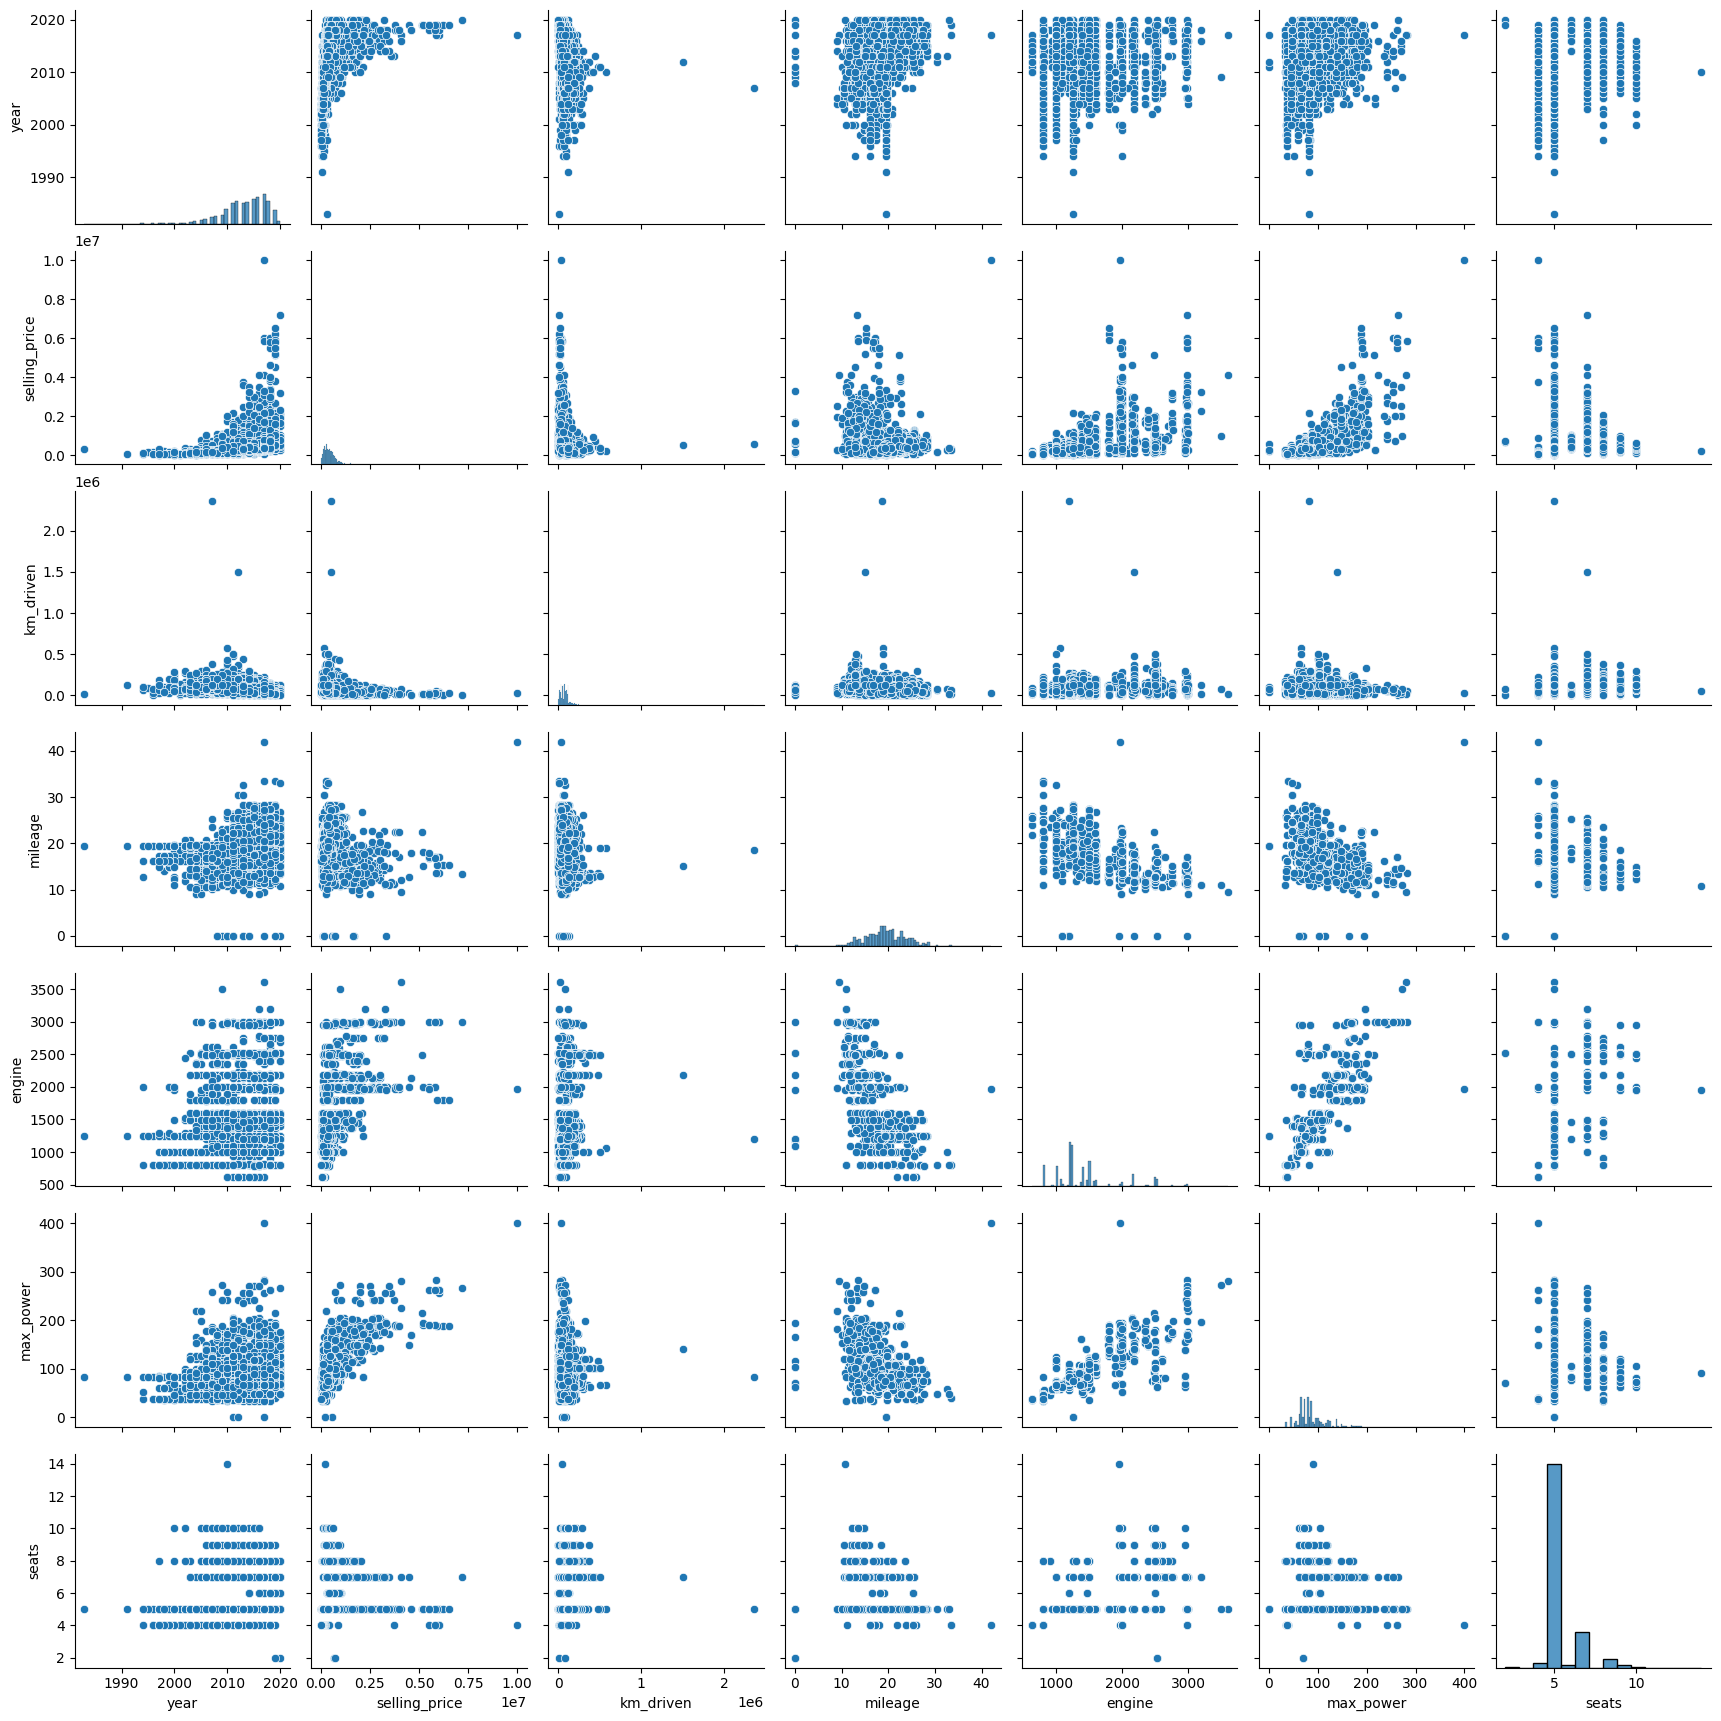

In [50]:
sns.pairplot(df_train)

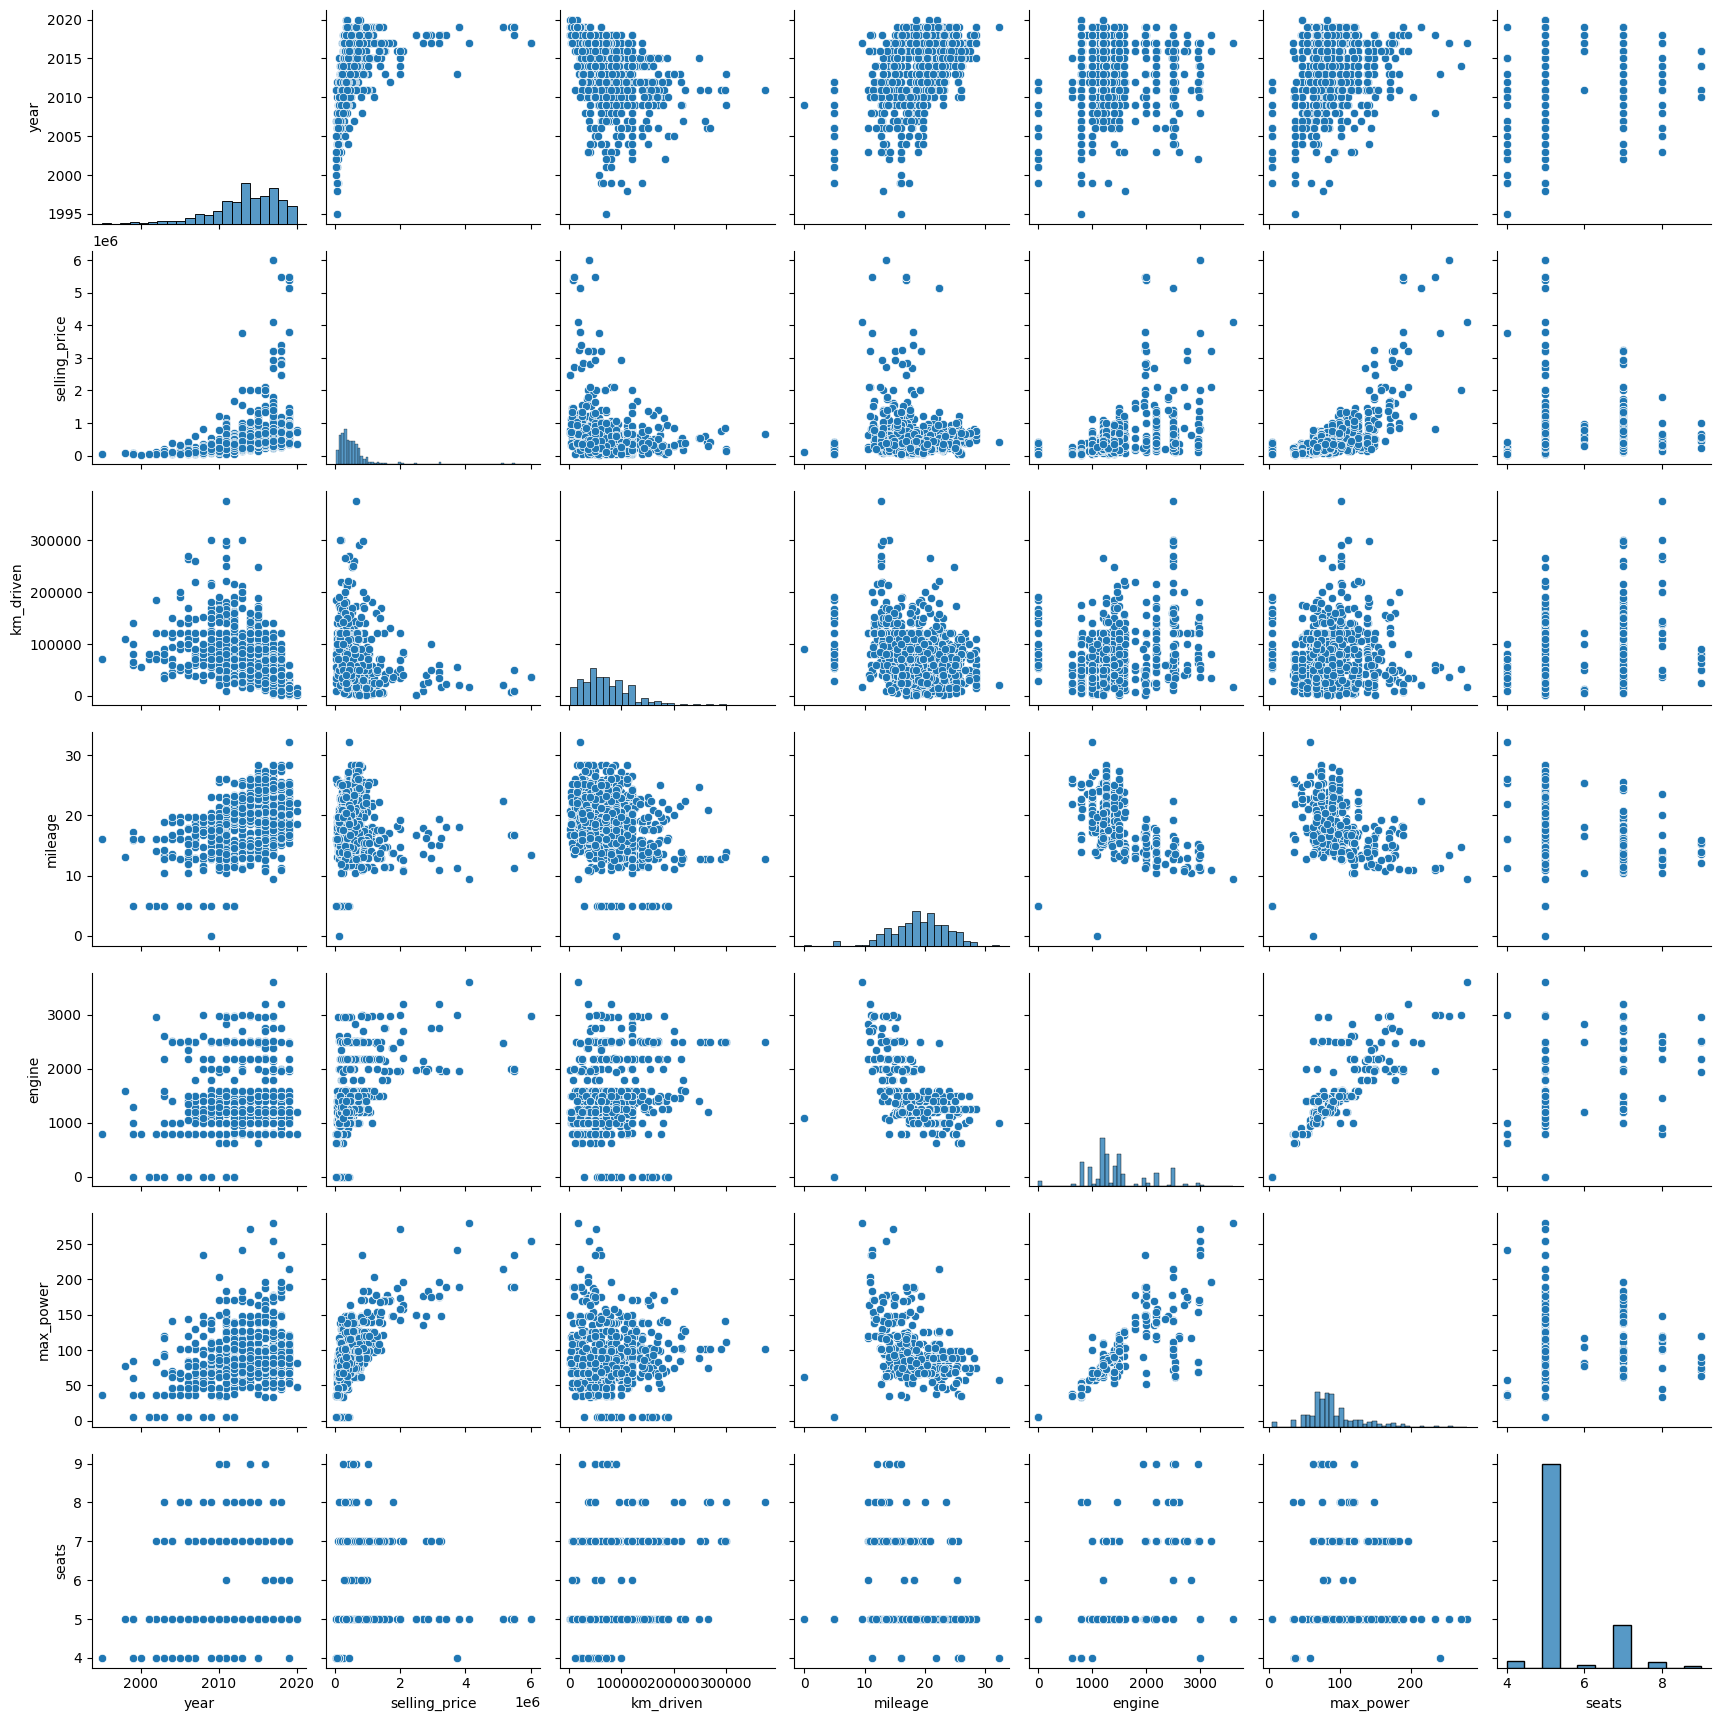

In [51]:
sns.pairplot(df_test)

Распределения на тренировчной и тестовой выборке получились примерно одинаковые (по зависимости таргета от признаков). Поэтому при обучении на train, полученная модель должна близко отыграть на тестовой выборке

Видна линейная корреляция между max power и engine, однако стеень их корреляции стоит посмотреть по коэффициентам корреляции (вряд ли он будет 0,95 и выше и значит исключение одного из признаков не нужно)

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [52]:
df_train.corr(numeric_only=True)

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.340493,0.002819,0.156904,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.105080,0.447672,0.692827,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.181925,0.229766,0.024579,0.192328
mileage,0.340493,-0.105080,-0.181925,1.000000,-0.573105,-0.373520,-0.451304
engine,0.002819,0.447672,0.229766,-0.573105,1.000000,0.681124,0.652172
max_power,0.156904,0.692827,0.024579,-0.373520,0.681124,1.000000,0.244123
seats,0.041178,0.149953,0.192328,-0.451304,0.652172,0.244123,1.000000


<Axes: >

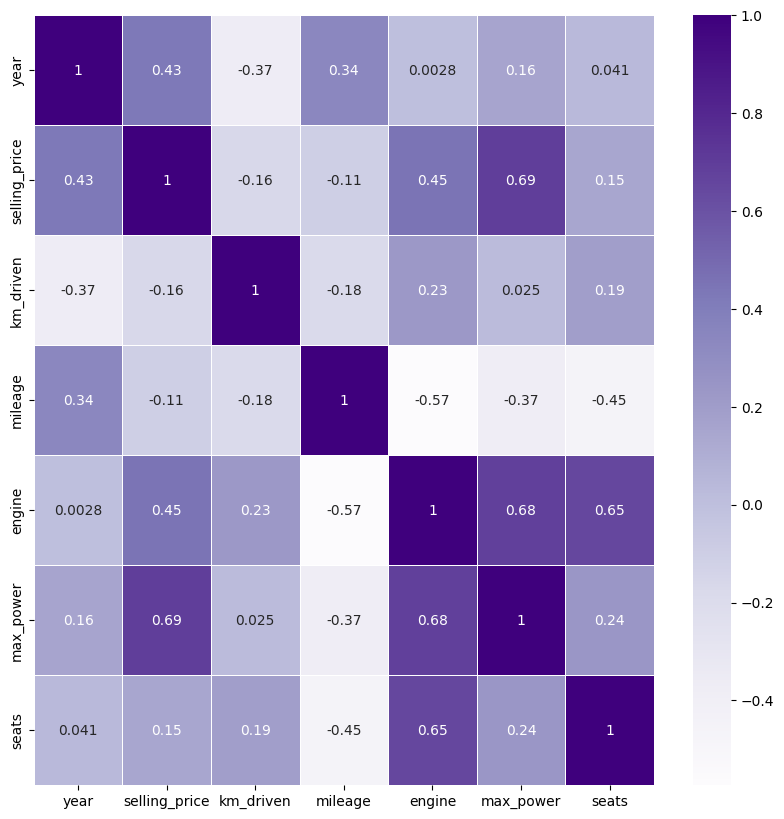

In [53]:
fig , ax = plt.subplots(figsize = (10,10))

sns.heatmap(df_train.corr(numeric_only=True),
            linewidths=0.5, annot=True,cmap='Purples',
            linecolor="white", annot_kws = {'size':10})

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1) Наименее скоррелированы: engine и year, year и seats

2) Cильная положительная линейная зависимость: max power и engine; seats и engine

3) В общем смысле да, наблюдается отрицательная линейная зависимость, но небольшая

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

<Axes: >

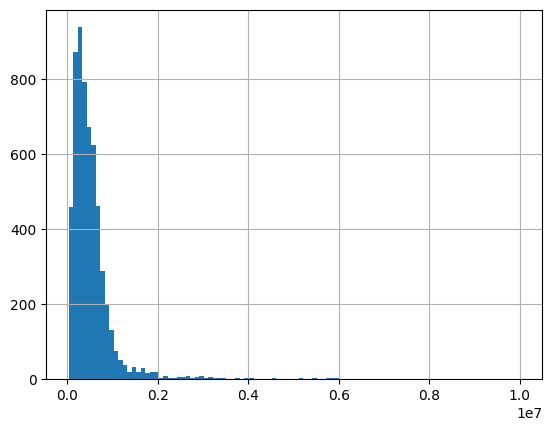

In [54]:
df_train['selling_price'].hist(bins=100)

In [55]:
df_train_log=df_train.copy()

In [56]:
import math
df_train_log['pricelog'] = df_train['selling_price'].apply(lambda x: math.log10(x))

<Axes: >

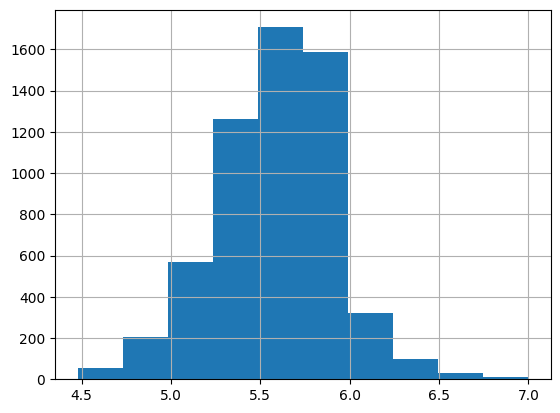

In [57]:
df_train_log['pricelog'].hist()

Посмотреть на распределение тагрета, в лучшем случае желательно получить распределение близкое к нормальному.

 По гистограмме исходного таргета видно, что распределение скошено в левую сторону - есть выбросы. Это можно исправить логарифмируя таргет - в данном случае помогло. При дальнейшем обучении можно было бы использовать логариф тагрета (по заданию не просят).

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [58]:
df_train.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,int64


In [59]:
df_train_1 = df_train.select_dtypes(include=['float64', 'int64']).copy()

In [60]:
df_test_1 = df_test.select_dtypes(include=['float64', 'int64']).copy()

In [61]:
y_train = df_train_1['selling_price']
X_train = df_train_1.drop('selling_price', axis=1)

In [62]:
X_train.shape

(5840, 6)

In [63]:
assert X_train.shape == (5840, 6)

In [64]:
y_test = df_test_1['selling_price']
X_test = df_test_1.drop('selling_price', axis=1)

In [65]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score as r2
model = LinearRegression()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
msetrain = MSE(y_train, pred_train)
msetest = MSE(y_test, pred_test)
r2train = r2(y_train, pred_train)
r2test = r2(y_test, pred_test)
print(f"{'Метрика':<20}{'Значение':>10}")
print('-' * 30)
print(f"{'MSE train':<20}{msetrain:>10.0f}")
print(f"{'MSE test':<20}{msetest:>10.0f}")
print(f"{'r2 train':<20}{r2train:>10.5f}")
print(f"{'r2 test':<20}{r2test:>10.5f}")

Метрика               Значение
------------------------------
MSE train           116873522067
MSE test            254290302631
r2 train               0.59226
r2 test                0.55762


Видно, что значения метрик модели по трейн и тест оказались близки по порядку (на тесте чуть похуже метрика MSE) - это не хорошо, не плохо (свидетельствует о том, что распределение признаков в обеих частях датасета сопоставимо, однако на другой выборке модель может повести себя иначе)

MSE не очень информативный показатель, так как показывает квадрат цены на а/м, лучше было бы применять RMSE (в целях эксперимента вывела его ниже)

R2 близко к  0,6 на трейне - не самое плохое значение, модель может работать с неизвестным набором данных, но необходимо ее поднять до более высоких значений (0,8-0,9 по возможности) за счет внедерния категориальных признаков или новых фичей

In [67]:
from sklearn.metrics import root_mean_squared_error as RMSE
RMSE(y_train, pred_train)

341867.6967298636

In [68]:
RMSE(y_test, pred_test)

504272.05220052693

По метрике RMSE мы видим, что ошибка модели на составляет 34к и 48к у.е.(доллары,евро). С учетом того, что цена на а/м находится может быть в пределах 100 тысяч у.е - это довольно большая ошибка

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
train_x_scaler = scaler.transform(X_train)
test_x_scaler = scaler.transform(X_test)
model_lr_sc = LinearRegression()
model_lr_sc.fit(train_x_scaler, y_train)
pred_train = model_lr_sc.predict(train_x_scaler)
pred_test = model_lr_sc.predict(test_x_scaler)
msetrain = MSE(y_train, pred_train)
msetest = MSE(y_test, pred_test)
r2train = r2(y_train, pred_train)
r2test = r2(y_test, pred_test)
print(f"{'Метрика':<20}{'Значение':>10}")
print('-' * 30)
print(f"{'MSE train':<20}{msetrain:>10.0f}")
print(f"{'MSE test':<20}{msetest:>10.0f}")
print(f"{'r2 train':<20}{r2train:>10.5f}")
print(f"{'r2 test':<20}{r2test:>10.5f}")

Метрика               Значение
------------------------------
MSE train           116873522067
MSE test            254290302631
r2 train               0.59226
r2 test                0.55762


ВЫВОДЫ

Метрика на 1 модели без скалера


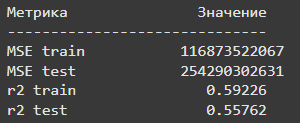

Вывод: никаких улучшений не стало

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

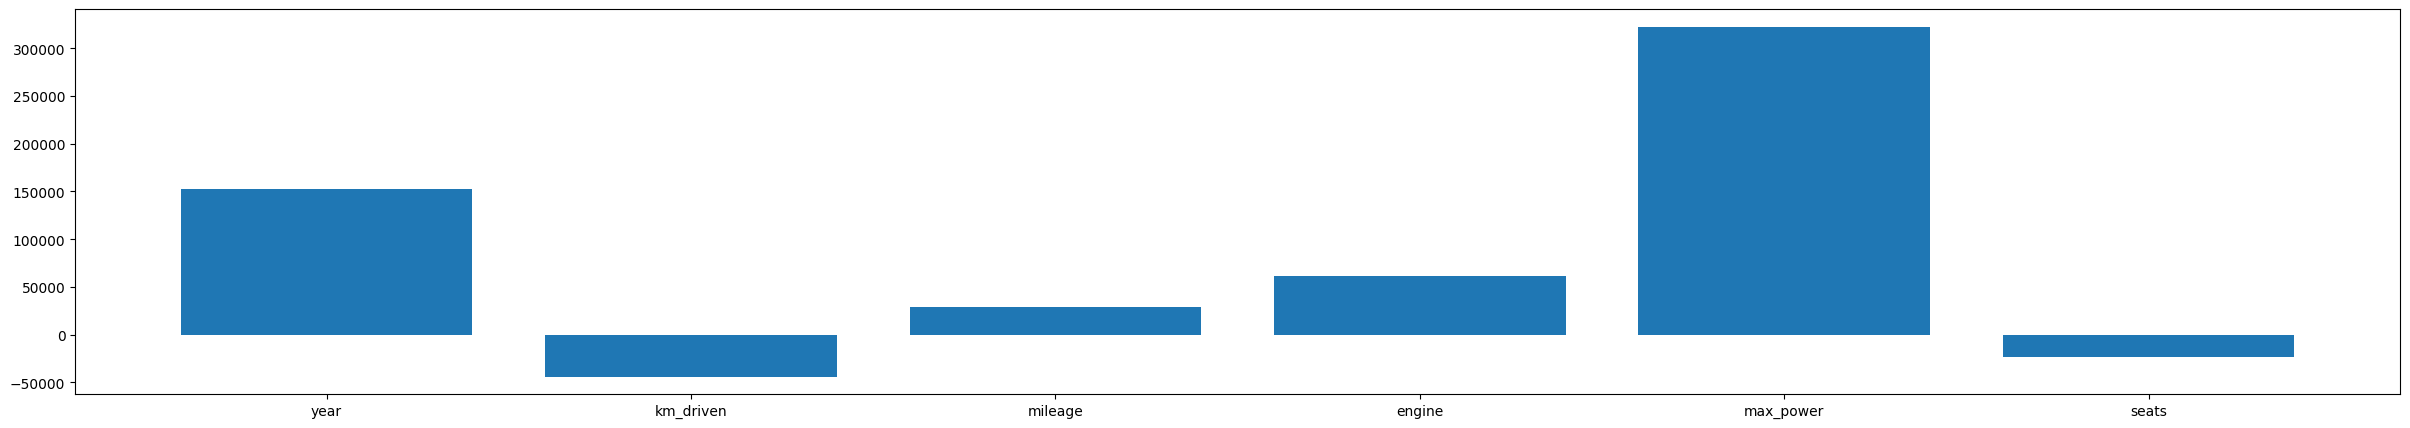

In [70]:
plt.figure(figsize=(30, 5))
plt.bar(x=list(X_train.columns.values), height=model_lr_sc.coef_)
plt.show()

In [71]:
pd.DataFrame(data=np.array([model_lr_sc.coef_]), columns=X_train.columns)

,year,km_driven,mileage,engine,max_power,seats
0,152769.52382,-44160.912287,28866.511286,61194.067365,322810.624194,-23201.37573


Самый большой коэффициент оказался по признаку max power. Однако все веса получились слишком большими - с этим надо бороться, так как при изменении величины признака на небольшую дельту отклик по модели может быть несоизмеримый

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [72]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.1)
lasso_regression.fit(train_x_scaler, y_train)
lasso_pred_train = lasso_regression.predict(train_x_scaler)
lasso_pred_test = lasso_regression.predict(test_x_scaler)
msetrain = MSE(y_train, lasso_pred_train)
msetest = MSE(y_test, lasso_pred_test)
r2train = r2(y_train, lasso_pred_train)
r2test = r2(y_test, lasso_pred_test)
print(f"{'Метрика':<20}{'Значение':>10}")
print('-' * 30)
print(f"{'MSE train':<20}{msetrain:>10.0f}")
print(f"{'MSE test':<20}{msetest:>10.0f}")
print(f"{'r2 train':<20}{r2train:>10.5f}")
print(f"{'r2 test':<20}{r2test:>10.5f}")

Метрика               Значение
------------------------------
MSE train           116873522067
MSE test            254290295829
r2 train               0.59226
r2 test                0.55762


In [73]:
pd.DataFrame(data=np.array([lasso_regression.coef_]), columns=X_train.columns)

,year,km_driven,mileage,engine,max_power,seats
0,152769.506942,-44160.799002,28866.321415,61193.583546,322810.712268,-23201.08848


Возможно применяемый по умолчания гиперпараметр альфа слишком мал для таких высоких весов по признакам, поэтому веса модели сильно не сжались

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [74]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV (estimator = Lasso(), param_grid= {'alpha': np.arange(2.6e+4, 2.68e+4, 1)},
                           scoring='r2', cv=10,
                           verbose=1)

# Обучаем модель
grid_search.fit(train_x_scaler, y_train)

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Получаем результаты
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение R2:", grid_search.best_score_)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits
Лучшие параметры: {'alpha': 26609.0}
Лучшее значение R2: 0.5750253916550461


Методом постепенного подбора диапазона гиперпараметров альфа выяснилось, что модель показывает лучшую среднюю метрику r2 на 10 фолдах при альфа = 26609

При кросс-валидации с альфа 0.1 (показал на разбивке трейн и тест 0.59 r2), средння метрика упала до 0.56

Обучалось 8000 моделей

Занулилось три веса (самые маленькие по модулю при построении линейной регрессии)

In [75]:
np.sum(best_model.coef_==0)

3

In [76]:
pd.DataFrame(data=np.array([best_model.coef_]), columns=X_train.columns)

,year,km_driven,mileage,engine,max_power,seats
0,145843.588706,-15736.72384,0.0,0.0,321824.270355,-0.0


Зафиксировать новую модель с Lasso регуляризацией

In [77]:
lasso_regression_best = Lasso(alpha = best_alpha)
lasso_regression_best.fit(train_x_scaler, y_train)

Lasso(alpha=26609.0)

Еще раз проверить метрики

In [78]:
lasso_pred_train = lasso_regression_best.predict(train_x_scaler)
lasso_pred_test = lasso_regression_best.predict(test_x_scaler)
msetrain = MSE(y_train, lasso_pred_train)
msetest = MSE(y_test, lasso_pred_test)
r2train = r2(y_train, lasso_pred_train)
r2test = r2(y_test, lasso_pred_test)
print(f"{'Метрика':<20}{'Значение':>10}")
print('-' * 30)
print(f"{'MSE train':<20}{msetrain:>10.0f}")
print(f"{'MSE test':<20}{msetest:>10.0f}")
print(f"{'r2 train':<20}{r2train:>10.5f}")
print(f"{'r2 test':<20}{r2test:>10.5f}")

Метрика               Значение
------------------------------
MSE train           119648613837
MSE test            260874457114
r2 train               0.58258
r2 test                0.54617


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [79]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()



grid_search = GridSearchCV(estimator=elastic_net, param_grid={
    'alpha': np.arange(4e-1, 1.1, 0.05),
    'l1_ratio': np.arange(5e-1, 1.1, 0.05)
},
                           scoring='r2', cv=10,
                           verbose=1)
grid_search.fit(train_x_scaler, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Получаем результаты
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение R2:", grid_search.best_score_)

Fitting 10 folds for each of 182 candidates, totalling 1820 fits
Лучшие параметры: {'alpha': 0.9499999999999998, 'l1_ratio': 0.8500000000000003}
Лучшее значение R2: 0.57677330329974


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
420 fits failed out of a total of 1820.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

In [80]:
# Получаем результаты
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение R2:", grid_search.best_score_)

Лучшие параметры: {'alpha': 0.9499999999999998, 'l1_ratio': 0.8500000000000003}
Лучшее значение R2: 0.57677330329974


Обучалось 1820 моделей, диапазон изменения гиперпараметров подбирался вручную, исходя из полученнных каждый раз средних значений метрик при кросс-валидации.

Лушчие параметры и метрика выведены выше

In [81]:
a = best_params.get('alpha')
b =best_params.get('l1_ratio')

Фиксируем Elastic Net модель на лучших подобранных гиперпараметрах

In [82]:
elastic_net = ElasticNet(alpha = a, l1_ratio = b)
elastic_net.fit(train_x_scaler, y_train)

ElasticNet(alpha=0.9499999999999998, l1_ratio=0.8500000000000003)

In [83]:
elastic_pred_train = elastic_net.predict(train_x_scaler)
elastic_pred_test = elastic_net.predict(test_x_scaler)
msetrain = MSE(y_train, elastic_pred_train)
msetest = MSE(y_test, elastic_pred_test)
r2train = r2(y_train, elastic_pred_train)
r2test = r2(y_test, elastic_pred_test)
print(f"{'Метрика':<20}{'Значение':>10}")
print('-' * 30)
print(f"{'MSE train':<20}{msetrain:>10.0f}")
print(f"{'MSE test':<20}{msetest:>10.0f}")
print(f"{'r2 train':<20}{r2train:>10.5f}")
print(f"{'r2 test':<20}{r2test:>10.5f}")

Метрика               Значение
------------------------------
MSE train           118909327754
MSE test            267493522333
r2 train               0.58516
r2 test                0.53466


На кросс-валидации с применением Elastic Net получилось лучшее среднее качество, однако на фиксированном разделении метрика на тесте упала и стала больше разница между MSE. Скорее всего данная модель не подходит

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [84]:
df_train_2 = df_train.copy()
df_test_2 = df_test.copy()

In [85]:
del df_train_2['name']
del df_test_2['name']

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [86]:
# assert X_train_cat.shape == (5840, 10)

In [87]:
# X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [88]:
df_train_2

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [89]:
df_train_2['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2])

In [90]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop = 'first')

In [91]:

encoder.fit(df_train_2[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])

OneHotEncoder(drop='first')

In [92]:
train_one_hot = encoder.transform(df_train_2[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])

In [93]:
test_one_hot = encoder.transform(df_test_2[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])

In [94]:
train_one_hot

<5840x18 sparse matrix of type '<class 'numpy.float64'>'
	with 24449 stored elements in Compressed Sparse Row format>

In [95]:
train_one_hot_df = pd.DataFrame(train_one_hot.toarray(), columns = encoder.get_feature_names_out(['fuel', 'seller_type', 'transmission', 'owner', 'seats']))

In [96]:
test_one_hot_df = pd.DataFrame(test_one_hot.toarray(), columns = encoder.get_feature_names_out(['fuel', 'seller_type', 'transmission', 'owner', 'seats']))

In [97]:
df_train_encoded = pd.concat([df_train_2.reset_index(drop=True), train_one_hot_df.reset_index(drop=True)], axis=1).drop(columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'])

In [98]:
df_train_encoded

,year,selling_price,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,450000,145500,23.40,1248,74.00,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,370000,120000,21.14,1498,103.52,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,225000,127000,23.00,1396,90.00,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,130000,120000,16.10,1298,88.20,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,440000,45000,20.14,1197,81.86,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,120000,191000,17.92,1086,62.10,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,2013,260000,50000,18.90,998,67.10,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5837,2013,320000,110000,18.50,1197,82.85,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,2007,135000,119000,16.80,1493,110.00,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
df_test_encoded = pd.concat([df_test_2.reset_index(drop=True), test_one_hot_df.reset_index(drop=True)], axis=1).drop(columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'])

In [100]:
df_test_encoded

,year,selling_price,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2010,229999,168000,14.00,2498,112.00,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2017,665000,25000,21.50,1497,108.50,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007,175000,218463,12.90,1799,130.00,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,635000,173000,25.10,1498,98.60,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,130000,70000,16.50,1172,65.00,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,250000,100000,19.81,1086,68.05,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
996,2017,440000,50000,18.60,1197,81.83,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,2009,340000,40000,23.00,1396,90.00,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
998,2012,350000,25000,20.36,1197,78.90,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [101]:
X_train = df_train_encoded.drop('selling_price', axis=1)
X_test = df_test_encoded.drop('selling_price', axis=1)
scaler = StandardScaler()
scaler.fit(X_train)
train_x_scaler_1 = scaler.transform(X_train)
test_x_scaler_1 = scaler.transform(X_test)

In [102]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [103]:
ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid= {'alpha': np.arange(600, 700, 1)},
                           scoring='r2', cv=10,
                           verbose=1)

grid_search.fit(train_x_scaler_1, y_train)

# Получение лучших параметров
best_alpha_ridge = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [104]:

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение R2:", grid_search.best_score_)

Лучшие параметры: {'alpha': 630}
Лучшее значение R2: 0.6217946866911255


In [105]:
ridge = Ridge(alpha = best_alpha_ridge)
ridge.fit(train_x_scaler_1, y_train)
ridge_pred_train = ridge.predict(train_x_scaler_1)
ridge_pred_test = ridge.predict(test_x_scaler_1)
msetrain = MSE(y_train, ridge_pred_train)
msetest = MSE(y_test, ridge_pred_test)
r2train = r2(y_train, ridge_pred_train)
r2test = r2(y_test, ridge_pred_test)
print(f"{'Метрика':<20}{'Значение':>10}")
print('-' * 30)
print(f"{'MSE train':<20}{msetrain:>10.0f}")
print(f"{'MSE test':<20}{msetest:>10.0f}")
print(f"{'r2 train':<20}{r2train:>10.5f}")
print(f"{'r2 test':<20}{r2test:>10.5f}")

Метрика               Значение
------------------------------
MSE train           96669800282
MSE test            236658515520
r2 train               0.66275
r2 test                0.58830


С добавлением категориальных признаков удалось поднять метрику на трейне, однако на тесте она осталась почти такой же, разрыв между значениями метрик большой (возможно переобучилась немного на трейне)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [106]:
def business_metric(y_true, y_pred):
    lower_bound = y_true * 0.9
    upper_bound = y_true * 1.1

    percent_10 = ((y_pred >= lower_bound) & (y_pred <= upper_bound)).mean()
    return percent_10
# просто проверка работоспособности метрики
p = business_metric(y_test, pred_test)
print(f"Доля на тестовой выборке: {p:.2%}")

Доля на тестовой выборке: 22.40%


Проверка метрики на всех типах моделей

In [107]:
def models(regressor, trainx, trainy, testx, testy):
  model = regressor
  model.fit(trainx, trainy)
  pred_train = model.predict(trainx)
  pred_test = model.predict(testx)
  bm_train = business_metric(trainy, pred_train)
  bm_test = business_metric(testy, pred_test)
  return  (f"Бизнес метрика трейн:{bm_train :.2%} Бизнес метрика тест: {bm_test:.2%}")

In [108]:
train_x_final = train_x_scaler_1
test_x_final = test_x_scaler_1

Lasso

In [109]:
models(Lasso(alpha = best_alpha), train_x_final,y_train,test_x_final,y_test)

'Бизнес метрика трейн:22.11% Бизнес метрика тест: 22.00%'

Elastic Net

In [110]:
models(ElasticNet(alpha = a, l1_ratio = b), train_x_final,y_train,test_x_final,y_test)

'Бизнес метрика трейн:22.47% Бизнес метрика тест: 26.30%'

Обычная линейная регрессия

In [111]:
models(LinearRegression(), train_x_final,y_train,test_x_final,y_test)

'Бизнес метрика трейн:21.56% Бизнес метрика тест: 24.70%'

In [112]:
models(Ridge(alpha = best_alpha_ridge), train_x_final,y_train,test_x_final,y_test)

'Бизнес метрика трейн:22.17% Бизнес метрика тест: 25.30%'

Модель Elastic Net дает лучший результат, но все еще очень маленький

Фbнальная модель



In [113]:
scaler = StandardScaler()
scaler.fit(X_train)
train_x_scaler_1 = scaler.transform(X_train)
test_x_scaler_1 = scaler.transform(X_test)

In [114]:
train_x_final = train_x_scaler_1
test_x_final = test_x_scaler_1

In [115]:
elastic_net = ElasticNet(alpha = a, l1_ratio = b)
elastic_net.fit(train_x_final, y_train)
elastic_pred_train = elastic_net.predict(train_x_final)
elastic_pred_test = elastic_net.predict(test_x_final)
coef = elastic_net.coef_

Зафиксировала полученную финальную модель в файл

In [116]:
import pickle

In [117]:
model_data = {
    'model': elastic_net,
    'scaler': scaler,
    'alpha': a,
    'l1_ratio': b,
    'coef': coef,
    'encoder': encoder
}

In [118]:
with open('model_data.pkl', 'wb') as file:
    pickle.dump(model_data, file)

print("Модель сохранена в 'model_data.pickle'.")

Модель сохранена в 'model_data.pickle'.


In [119]:
with open('model_data.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
!python3 -m pip install "fastapi[all]"
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import pickle

In [121]:
%%writefile main.py
from fastapi import FastAPI, UploadFile, File
from fastapi.responses import FileResponse
from pydantic import BaseModel
from typing import List
import numpy as np
import pandas as pd
import json
import os

class Item(BaseModel):
    year: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


import pickle
with open('model_data.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
model = loaded_model['model']
scaler = loaded_model['scaler']
encoder = loaded_model['encoder']


app = FastAPI()

def preprocess_data(item: Item) -> np.ndarray:

    data = pd.DataFrame([json.loads(item.model_dump_json())])
    data['engine'] = data['engine'].str.extract(r'([\d.]+)').astype(int)
    data['mileage'] = data['mileage'].str.extract(r'([\d.]+)').astype(float)
    data['max_power'] = data['max_power'].str.extract(r'([\d.]+)').astype(float)
    data['seats'] = data['seats'].astype(int)
    data_encoded = encoder.transform(data[['fuel', 'seller_type', 'transmission', 'owner','seats']])
    numerical_data = data[['year','mileage','engine','max_power', 'km_driven']]
    processed_data = np.hstack((numerical_data, data_encoded.toarray()))
    return processed_data


async def predict_item(item: Item) -> float:
    features = preprocess_data(item)
    prediction = model.predict(features)[0]
    return float(prediction)

def predict_items(items: List[Item]) -> List[float]:
    predictions = []
    for item in items:
        features = preprocess_data(item)
        prediction = model.predict(features)[0]
        predictions.append(float(prediction))
    return predictions

@app.post("/predict_item/")
async def predict(item: Item):
    prediction = await predict_item(item)

    return {
        "prediction": prediction
    }

@app.post("/predict_items/")
async def predict_csv(file: UploadFile = File(...)):
    # Загрузка CSV-файла н
    items = pd.read_csv(file.file)

    # Преобразование DataFrame в список
    items_list = [Item(**row) for index, row in items.iterrows()]
    predictions = predict_items(items_list)
    items['predicted_price'] = predictions
    output_file = 'predicted_items.csv'
    items.to_csv(output_file, index=False)
    return FileResponse(output_file, media_type='text/csv', filename='predicted_items.csv')

Overwriting main.py


In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

35.236.223.5⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://fastapi.loca.lt
INFO:     Started server process [44521]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     109.252.222.80:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     109.252.222.80:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     109.252.222.80:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     109.252.222.80:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [44521]


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

